In [1]:
import pkg_resources
try:
    pkg_resources.require("networkx==2.1")
    import networkx as nx
except:
    import sys
    !{sys.executable} -m pip install -I networkx==2.1
    pkg_resources.require("networkx==2.1")
    import networkx as nx

In [2]:
from prm import ProbabilisticRoadMap
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = 20, 20

In [4]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [5]:
prm = ProbabilisticRoadMap(data, num_samples=2000, zmin=5, zmax=5)

Collision checking took 0.12064886093139648 seconds ...
Kept 1000 of 1000 points
Average node coverage area: 846.4
Grid center: (144.7611, 15.768500000000017)
Sample point center: ([144.14477188  14.37188363  33.43691359])
Recommended search radius: 0.0
Graph creation took 4.413466215133667 seconds ...
Graph has 1598 edges.


In [6]:
#start = list(prm._graph.nodes)[20]
#find_goal = True
#while find_goal:
#    k = np.random.randint(len(prm._graph.nodes))
#    print(k, len(prm._graph.nodes))
#    goal = list(prm._graph.nodes)[k]
#    if goal[2] == start[2]:
#        find_goal = False
start = (0.14018425345420837, 0.0069622318260371685, 0.0)
goal = (-42.43583077099174, -111.37325211940333, 0.0)

print("start: {}".format(start))
print("goal:  {}".format(goal))

start: (0.14018425345420837, 0.0069622318260371685, 0.0)
goal:  (-42.43583077099174, -111.37325211940333, 0.0)


In [7]:
path = prm.plan_path(start, goal)

Adding starting edge to graph: (0.14018425345420837, 0.0069622318260371685, 0.0) <-> (7.300162499999999, -15.991902377686301, 5.0)
Adding goal edge to graph: (-35.8248375, -106.8560999085505, 5.0) <-> (-42.43583077099174, -111.37325211940333, 0.0)
Found a path.
7 [(0.14018425345420837, 0.0069622318260371685, 0.0), (7.300162499999999, -15.991902377686301, 5.0), (4.604849999999999, -42.91462757201646, 5.0), (-3.481087500000001, -76.56803406492912, 5.0), (-11.567025000000001, -113.58678120713307, 5.0), (-35.8248375, -106.8560999085505, 5.0), (-42.43583077099174, -111.37325211940333, 0.0)]


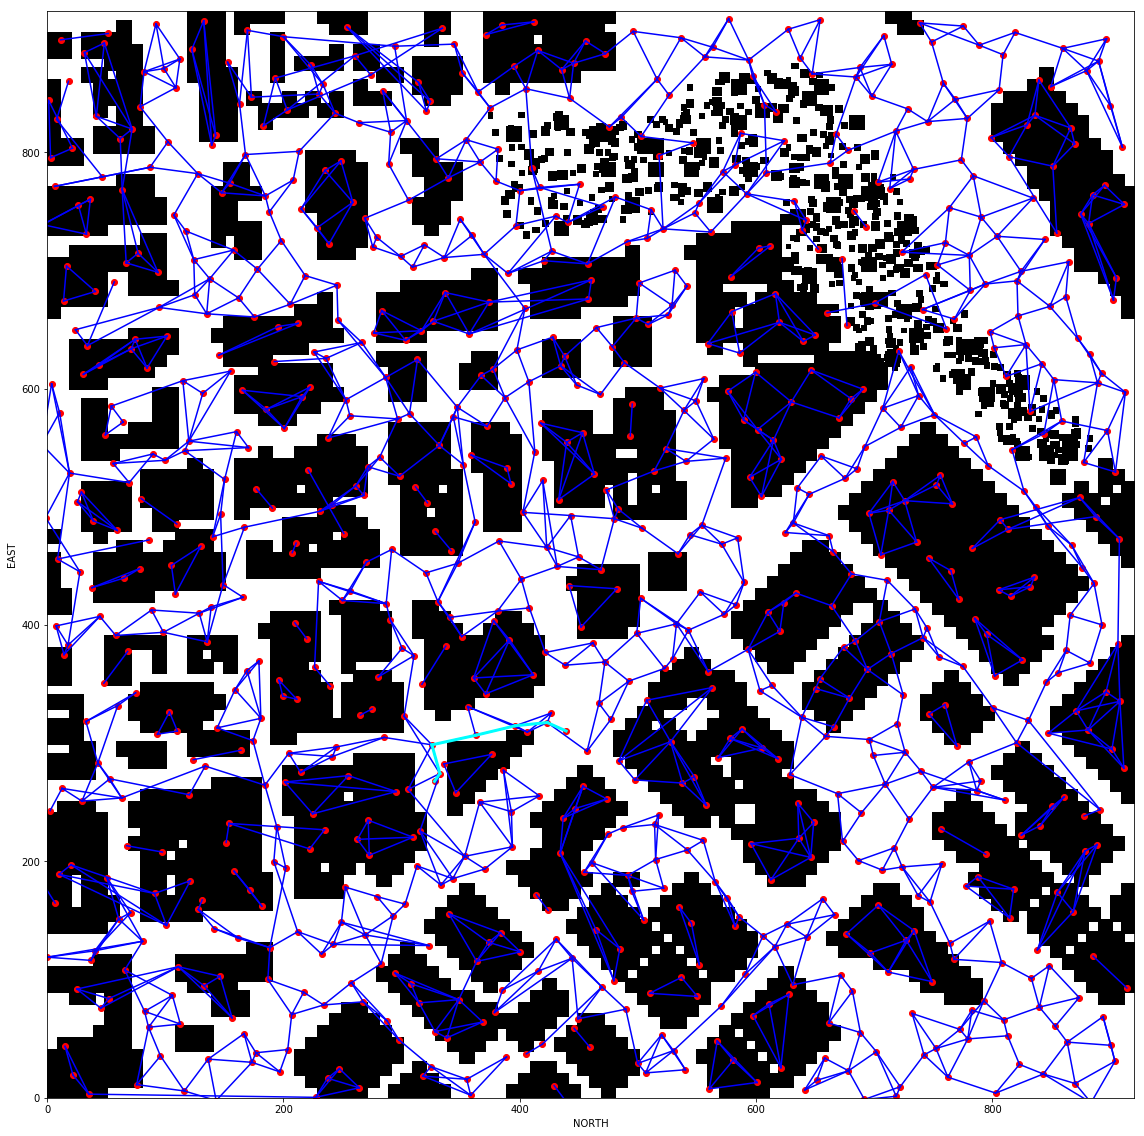

In [8]:
fig = plt.figure()

from planning_utils import create_grid
grid, _ = create_grid(data, 1, 1)
plt.imshow(grid, cmap='Greys', origin='lower')

# Add code to visualize path here
nmin = np.min(data[:, 0])
emin = np.min(data[:, 1])

# draw nodes
for n1 in prm._graph.nodes:
    plt.scatter(n1[1] - emin, n1[0] - nmin, c='red')
    
# draw edges
for (n1, n2) in prm._graph.edges:
    plt.plot([n1[1] - emin, n2[1] - emin], [n1[0] - nmin, n2[0] - nmin], 'blue')
    
# TODO: add code to visualize the path
path_pairs = zip(path[:-1], path[1:])
for (n1, n2) in path_pairs:
    plt.plot([n1[1] - emin, n2[1] - emin], 
             [n1[0] - nmin, n2[0] - nmin], 
             'cyan', linewidth=3)


plt.xlabel('NORTH')
plt.ylabel('EAST')
plt.axis([0, prm._grid.xrange, 0, prm._grid.yrange])

plt.show()